In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats

Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Supplemental Figure 4/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

### Figure 4.a

In [4]:
pbmc = sc.read("../data/train_pbmc.h5ad")
pbmc

AnnData object with n_obs × n_vars = 16893 × 6998 
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [5]:
def replace_conditions(adata):
    adata.obs["condition"].replace("CD4T_ctrl", "CD4-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD4T_real_stim", "CD4-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD4T_pred_stim", "CD4-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD8T_ctrl", "CD8-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD8T_real_stim", "CD8-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD8T_pred_stim", "CD8-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("Dendritic_ctrl", "DC_ctrl", inplace=True)
    adata.obs["condition"].replace("Dendritic_real_stim", "DC_real_stim", inplace=True)
    adata.obs["condition"].replace("Dendritic_pred_stim", "DC_pred_stim", inplace=True)

    adata.obs["condition"].replace("FCGR3A+Mono_ctrl", "F-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_real_stim", "F-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_pred_stim", "F-Mono_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD14+Mono_ctrl", "CD14-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_real_stim", "CD14-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_pred_stim", "CD14-Mono_pred_stim", inplace=True)
def replace_cell_types(adata):
    adata.obs["cell_type"].replace("CD4T", "CD4-T", inplace=True)
    adata.obs["cell_type"].replace("CD8T", "CD8-T", inplace=True)
    adata.obs["cell_type"].replace("Dendritic", "DC", inplace=True)
    adata.obs["cell_type"].replace("FCGR3A+Mono", "F-Mono", inplace=True)
    adata.obs["cell_type"].replace("CD14+Mono", "CD14-Mono", inplace=True)

In [6]:
def visualize_latent(network, model_name, figure):
    true_labels, _ = scgen.label_encoder(pbmc)
    if model_name == "CVAE":
        latent = network.to_latent(pbmc.X.A, labels=true_labels)
    else:
        latent = network.to_latent(pbmc.X.A)
    latent = sc.AnnData(X=latent,
                        obs={"condition": pbmc.obs["condition"].tolist(),
                             "cell_type": pbmc.obs["cell_type"].tolist()})
    replace_cell_types(latent)
    sc.pp.neighbors(latent)
    sc.tl.umap(latent)
    if model_name == "scGen":
        sc.pl.umap(latent, color=["condition"],
                   palette=["#96a1a3", "#A4E804"],
                   save=f"_latent_conditions.pdf",
                   frameon=False,
                   legend_fontsize=22,
                   show=True)
        sc.pl.umap(latent, color=["cell_type"],
                   save=f"_latent_celltypes.pdf",
                   frameon=False,
                   legend_fontsize=22,
                   show=True)
    else:
        sc.pl.umap(latent, color=["condition"],
                   palette=["#96a1a3", "#A4E804"],
                   save=f"_latent_conditions.pdf",
                   frameon=False,
                   legend_loc=False,
                   show=True)
        sc.pl.umap(latent, color=["cell_type"],
                   save=f"_latent_celltypes.pdf",
                   frameon=False,
                   legend_loc=False,
                   show=True)
    
    os.rename(src=os.path.join(path_to_save, "umap_latent_conditions.pdf"), 
              dst=os.path.join(path_to_save, f"SupplFig4{figure}_{model_name}_umap_conditions.pdf"))

    os.rename(src=os.path.join(path_to_save, "umap_latent_celltypes.pdf"), 
              dst=os.path.join(path_to_save, f"SupplFig4{figure}_{model_name}_umap_celltypes.pdf"))

INFO:tensorflow:Restoring parameters from ../models/CVAE/pbmc/all/models/scgen
         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'condition' as categorical
... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_conditions.pdf


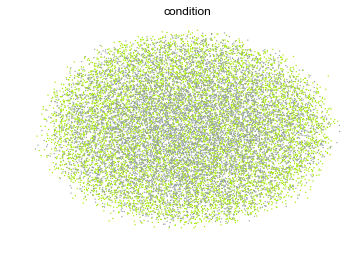

saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_celltypes.pdf


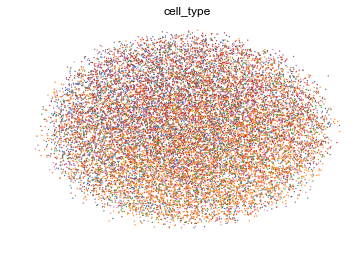

In [7]:
cvae = scgen.CVAE(x_dimension=pbmc.shape[1], z_dimension=100, model_path="../models/CVAE/pbmc/all/models/scgen")
cvae.restore_model()
visualize_latent(cvae, "CVAE", "a")

INFO:tensorflow:Restoring parameters from ../models/pbmc/CD4T/models/scgen
         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'condition' as categorical
... storing 'cell_type' as categorical


saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_conditions.pdf


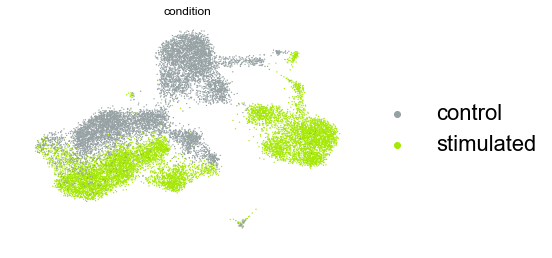

saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_celltypes.pdf


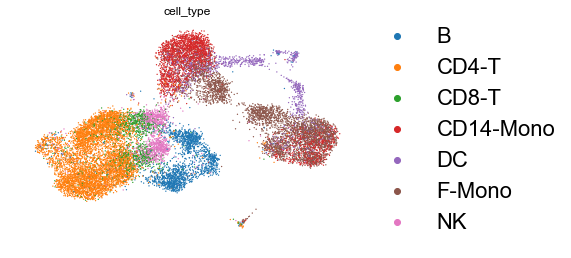

In [8]:
scGen = scgen.VAEArith(x_dimension=pbmc.shape[1], z_dimension=100, model_path="../models/pbmc/CD4T/models/scgen")
scGen.restore_model()
visualize_latent(scGen, "scGen", "c")

In [20]:
%%bash
python ../code/st_gan.py latent

/Users/Future/Desktop/Fall-2018/Research-Interests/Bioinformatics/scGen_reproducibility/Jupyter Notebooks
latent
model has been trained/restored!
         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_cell_type.png
saving figure to file ../results/Figures/Supplemental Figure 4/umap_latent_condition.png


2019-04-10 12:28:30.189343: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
... storing 'cell_type' as categorical
... storing 'condition' as categorical


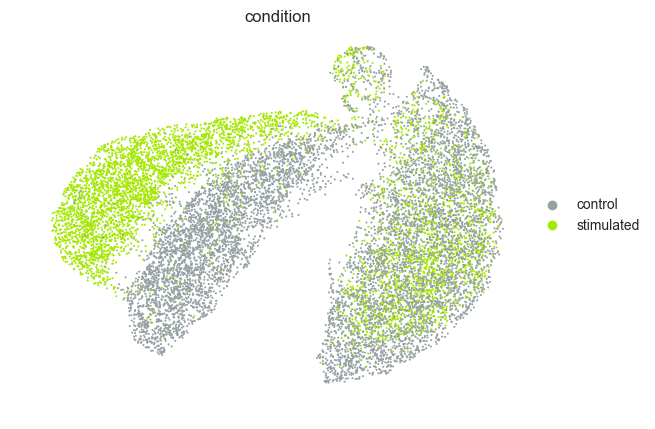

In [24]:
from IPython.display import Image
Image(os.path.join(path_to_save, "SupplFig4b_style_transfer_condition.png"))

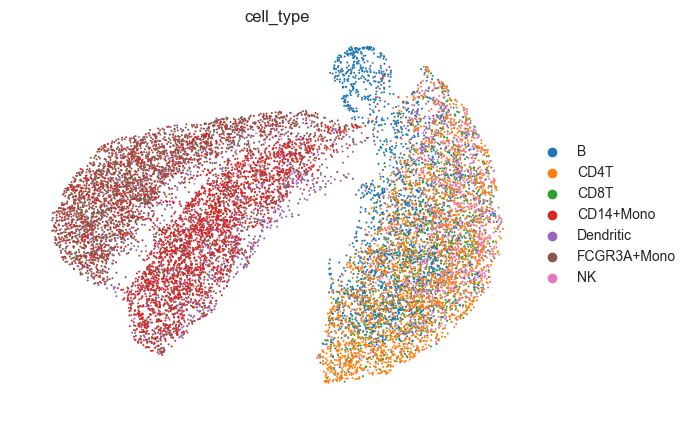

In [25]:
Image(os.path.join(path_to_save, "SupplFig4b_style_transfer_celltype.png"))